In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
num_lables = len(np.unique(y_train))

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
image_size = x_train.shape[1]

In [8]:
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

In [10]:
model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_lables))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

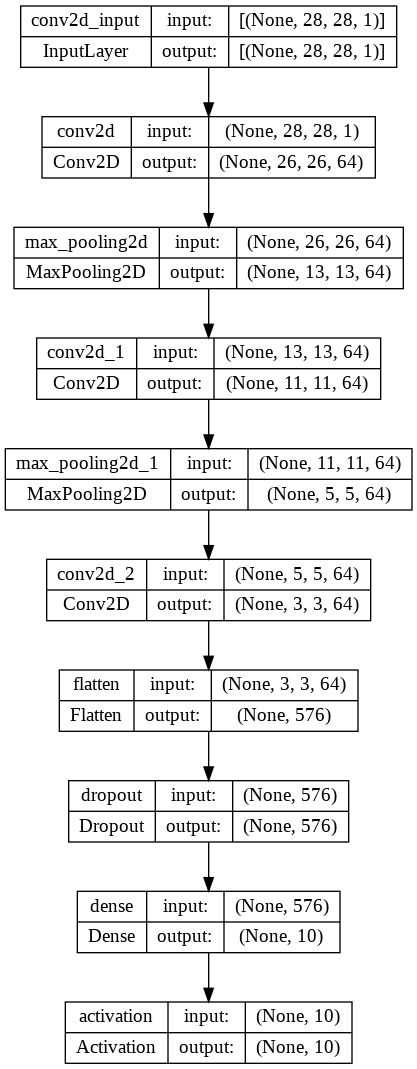

In [11]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 108s 230ms/step - loss: 0.2519 - accuracy: 0.9227
Epoch 2/10
469/469 [==============================] - 85s 180ms/step - loss: 0.0671 - accuracy: 0.9794
Epoch 3/10
469/469 [==============================] - 87s 185ms/step - loss: 0.0480 - accuracy: 0.9855
Epoch 4/10
469/469 [==============================] - 86s 182ms/step - loss: 0.0401 - accuracy: 0.9875
Epoch 5/10
469/469 [==============================] - 86s 183ms/step - loss: 0.0311 - accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 85s 181ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 85s 180ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 8/10
469/469 [==============================] - 85s 181ms/step - loss: 0.0201 - accuracy: 0.9934
Epoch 9/10
469/469 [==============================] - 85s 182ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 10/10
469/469 [==============================] - 86s 184ms/step - 

In [16]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

In [17]:
print("Accuracy: %.lf%%" % (100.0 * acc))

Accuracy: 99%
